In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df=pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,5/18/2009,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0,No
1,7/3/2009,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,0.0,No
2,2/18/2010,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2,No
3,3/4/2010,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0,No
4,9/9/2010,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,0.4,No


Our aim is to build a model which can predict the amount of rainfall.

Therefore we have imported the necesary libraries to do an initial analysis and imported the csv file into a pandas dataframe called df.

The dataset contains two target variables: 'Rain_Tomorrow' which is categorical and we shall drop before proceeding further and the other target variable is the 'RISK_MM' variable which is continuous in nature and we shall attempt to build regression model with 70-30 train test split to predict this variable.
 


In [ ]:
df.drop(['RainTomorrow'],axis=1,inplace=True)

In [ ]:
df.shape
# the dataset has 36881 rows and 23 columns

(36881, 23)

In [ ]:
df.info()
#we have a mix of categorical and numeric variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           36881 non-null  object 
 1   Location       36881 non-null  object 
 2   MinTemp        36543 non-null  float64
 3   MaxTemp        36639 non-null  float64
 4   Rainfall       36255 non-null  float64
 5   Evaporation    24035 non-null  float64
 6   Sunshine       23317 non-null  float64
 7   WindGustDir    33513 non-null  object 
 8   WindGustSpeed  33520 non-null  float64
 9   WindDir9am     34072 non-null  object 
 10  WindDir3pm     35919 non-null  object 
 11  WindSpeed9am   36219 non-null  float64
 12  WindSpeed3pm   36235 non-null  float64
 13  Humidity9am    36311 non-null  float64
 14  Humidity3pm    36370 non-null  float64
 15  Pressure9am    33309 non-null  float64
 16  Pressure3pm    33329 non-null  float64
 17  Cloud9am       24381 non-null  float64
 18  Cloud3

In [ ]:
df.isnull().sum()
#except for Date and Location other variables have null values which need to be explored further.

Date                 0
Location             0
MinTemp            338
MaxTemp            242
Rainfall           626
Evaporation      12846
Sunshine         13564
WindGustDir       3368
WindGustSpeed     3361
WindDir9am        2809
WindDir3pm         962
WindSpeed9am       662
WindSpeed3pm       646
Humidity9am        570
Humidity3pm        511
Pressure9am       3572
Pressure3pm       3552
Cloud9am         12500
Cloud3pm         12982
Temp9am            487
Temp3pm            444
RainToday          626
RISK_MM            620
dtype: int64

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,36543.000000,36639.000000,36255.000000,24035.000000,23317.000000,33520.000000,36219.000000,36235.000000,36311.000000,36370.000000,33309.000000,33329.000000,24381.000000,23899.000000,36394.000000,36437.000000,36261.000000
mean,12.235966,22.939491,2.554823,5.189544,7.544688,40.390573,14.217427,18.874928,69.146953,52.307369,1017.283152,1014.967769,4.331488,4.462321,16.905688,21.485808,2.554748
std,6.389832,6.988266,9.081329,3.765427,3.833809,13.550613,8.997003,8.791849,18.300754,20.317082,7.177877,7.077594,2.848750,2.663067,6.428328,6.820848,8.940267
min,-8.500000,-3.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,1.000000,982.900000,980.200000,0.000000,0.000000,-5.900000,-5.100000,0.000000
25%,7.600000,17.800000,0.000000,2.600000,4.700000,31.000000,7.000000,13.000000,58.000000,38.000000,1012.500000,1010.100000,1.000000,2.000000,12.300000,16.500000,0.000000
50%,12.100000,22.300000,0.000000,4.600000,8.400000,39.000000,13.000000,19.000000,70.000000,53.000000,1017.300000,1015.000000,5.000000,5.000000,16.600000,20.900000,0.000000
75%,17.000000,27.900000,0.800000,7.000000,10.600000,48.000000,20.000000,24.000000,83.000000,66.000000,1022.200000,1019.800000,7.000000,7.000000,21.500000,26.200000,0.800000
max,30.500000,48.100000,371.000000,81.200000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,37.700000,46.100000,367.600000


In [ ]:
df[df.duplicated()]
#therefore we have no duplicate values in the dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM


In [ ]:
categorical_columns=[]
for col in df.columns:
  if df[col].dtype=='O':
    categorical_columns.append(col)
print(categorical_columns)

# we have 6 categorical columns

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [ ]:
df[categorical_columns].isnull().sum()

# looking at whether the categorical columns have null values or not
# we can see that except the date and location features the other categorical features have null values

Date              0
Location          0
WindGustDir    3368
WindDir9am     2809
WindDir3pm      962
RainToday       626
dtype: int64

In [ ]:
df['Location'].nunique()
#there are 46 unique locations from which the data has been collected 

46

In [ ]:
df['WindGustDir'].nunique()
# there are 16 unique wind gust directions

16

In [ ]:
df['WindDir9am'].nunique()
#there are 16 unique Wind Directions at 9 am

16

In [ ]:
df['WindDir3pm'].nunique()
# there are 16 different wind directions at 3 pm

16

In [ ]:
df['RainToday'].nunique()

2

In [ ]:
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
# dealing with the date using the datetime feature to extract the day,month and year

df["Date"].nunique()
# there are 1473 unique dates in the dataset

1473

In [ ]:
df['Date'].dtype
# we see that the date has been wrongly attributed as a categorical feature and we shall try to bring it to proper format

dtype('O')

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df["Date"].dtype

dtype('<M8[ns]')

In [ ]:
# creating 3 new columns 
# they shall contain the year,month and the date

In [ ]:
df["Year"]=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

In [ ]:
df.head()
# we can see that the 3 new columns have been added to the last of the dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
0,2009-05-18,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,1022.2,1.0,1.0,9.1,13.3,No,0.0,2009,5,18
1,2009-07-03,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,1002.4,NaN,NaN,1.3,13.7,No,0.0,2009,7,3
2,2010-02-18,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,1021.9,6.0,4.0,22.7,24.4,No,0.2,2010,2,18
3,2010-03-04,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,1014.9,6.0,1.0,20.0,26.1,No,0.0,2010,3,4
4,2010-09-09,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,1015.0,NaN,NaN,22.2,22.6,No,0.4,2010,9,9


In [ ]:
# dropping the original date column from the dataset since it is no longer required
df.drop('Date',axis=1,inplace=True)

In [ ]:
df.head()
#the Date column has been removed

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
0,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,SSE,...,1022.2,1.0,1.0,9.1,13.3,No,0.0,2009,5,18
1,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,SW,...,1002.4,NaN,NaN,1.3,13.7,No,0.0,2009,7,3
2,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,SSE,...,1021.9,6.0,4.0,22.7,24.4,No,0.2,2010,2,18
3,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,SW,...,1014.9,6.0,1.0,20.0,26.1,No,0.0,2010,3,4
4,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,N,...,1015.0,NaN,NaN,22.2,22.6,No,0.4,2010,9,9


In [ ]:
categorical_columns
# we are looking at the lsit of categorical columns again
# we shall generate value counts and visualise the repitition

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']].isnull().sum()

Location          0
WindGustDir    3368
WindDir9am     2809
WindDir3pm      962
RainToday       626
dtype: int64

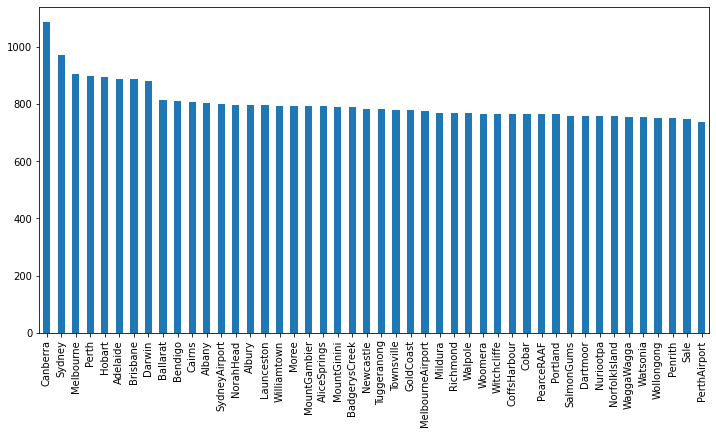

In [ ]:
plt.figure(figsize=(12,6))
df['Location'].value_counts().plot(kind='bar')
# this visual helps us to see that how many times the data was collected for each of the 46 different locations

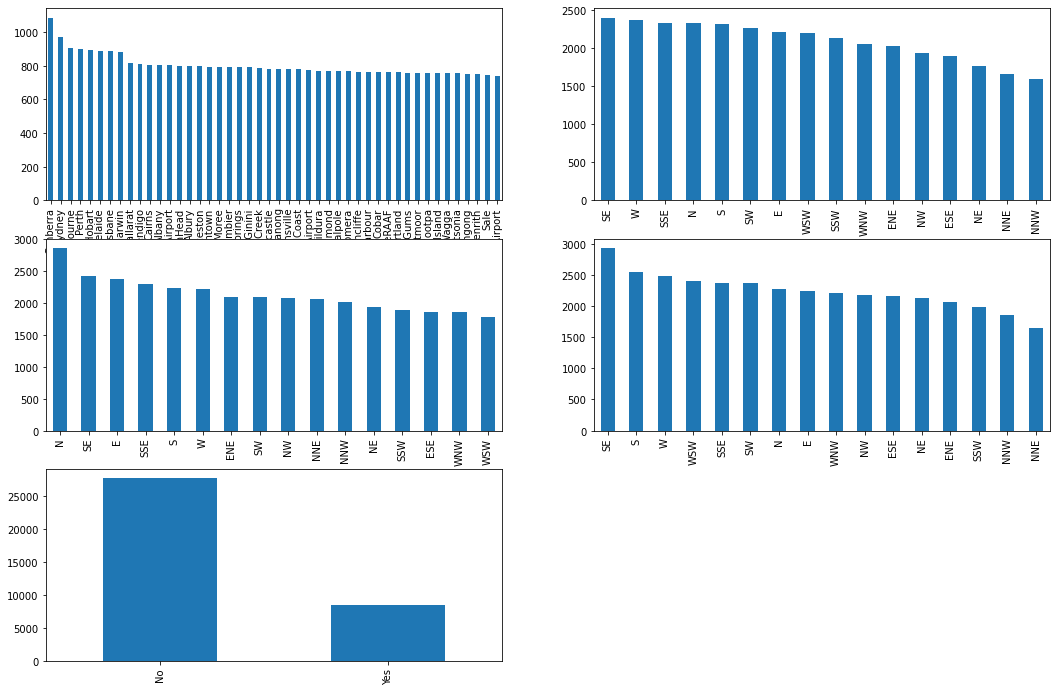

In [ ]:
#generating sub plots to see the repetition of the values in the categorical columns

plt.figure(figsize=(18,12))
plt.subplot(3,2,1)
df['Location'].value_counts().plot(kind='bar')


plt.subplot(3,2,2)
df['WindGustDir'].value_counts().plot(kind='bar')


plt.subplot(3,2,3)
df['WindDir9am'].value_counts().plot(kind='bar')


plt.subplot(3,2,4)
df['WindDir3pm'].value_counts().plot(kind='bar')


plt.subplot(3,2,5)
df['RainToday'].value_counts().plot(kind='bar')


In [ ]:
# Imputation of missing values in the categorical variables with the modal values
categorical=["Location","WindGustDir","WindDir9am","WindDir3pm","RainToday"] 

for col in categorical:
    col_mode=df[col].mode()[0]
    df[col].fillna(col_mode, inplace=True)

In [ ]:
df[categorical].isnull().sum()

#verifying the imputation of mode in the categorical columns

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [ ]:
# now we shall look at the numeric columns

numerical_columns=[]
for i in df.columns:
  if df[i].dtype != "O":
    numerical_columns.append(i)
print(numerical_columns)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'Year', 'Month', 'Day']


In [ ]:
print(len(numerical_columns))
# there are 20 numeric columns in the dataset

20


In [ ]:
df[numerical_columns].isnull().sum()
# looking at the null values in the numeric columns 

MinTemp            338
MaxTemp            242
Rainfall           626
Evaporation      12846
Sunshine         13564
WindGustSpeed     3361
WindSpeed9am       662
WindSpeed3pm       646
Humidity9am        570
Humidity3pm        511
Pressure9am       3572
Pressure3pm       3552
Cloud9am         12500
Cloud3pm         12982
Temp9am            487
Temp3pm            444
RISK_MM            620
Year                 0
Month                0
Day                  0
dtype: int64

In [ ]:
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,36543.0,12.235966,6.389832,-8.5,7.6,12.1,17.0,30.5
MaxTemp,36639.0,22.939491,6.988266,-3.1,17.8,22.3,27.9,48.1
Rainfall,36255.0,2.554823,9.081329,0.0,0.0,0.0,0.8,371.0
Evaporation,24035.0,5.189544,3.765427,0.0,2.6,4.6,7.0,81.2
Sunshine,23317.0,7.544688,3.833809,0.0,4.7,8.4,10.6,14.3
WindGustSpeed,33520.0,40.390573,13.550613,7.0,31.0,39.0,48.0,135.0
WindSpeed9am,36219.0,14.217427,8.997003,0.0,7.0,13.0,20.0,87.0
WindSpeed3pm,36235.0,18.874928,8.791849,0.0,13.0,19.0,24.0,87.0
Humidity9am,36311.0,69.146953,18.300754,2.0,58.0,70.0,83.0,100.0
Humidity3pm,36370.0,52.307369,20.317082,1.0,38.0,53.0,66.0,100.0


In [ ]:
df[numerical_columns].corr()
#looking at the correlation between the variables

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Year,Month,Day
MinTemp,1.000000,0.745450,0.114714,0.514247,0.046233,0.185390,0.169488,0.175644,-0.212781,0.036832,-0.427758,-0.434029,0.135306,0.075516,0.904969,0.718091,0.135042,0.034027,-0.192268,0.013453
MaxTemp,0.745450,1.000000,-0.058451,0.632326,0.445373,0.073319,0.002626,0.046446,-0.477478,-0.469851,-0.308608,-0.394379,-0.256593,-0.242541,0.888116,0.983865,-0.029468,0.010240,-0.183253,0.028593
Rainfall,0.114714,-0.058451,1.000000,-0.065744,-0.229616,0.127205,0.082290,0.055642,0.234658,0.256748,-0.167669,-0.128309,0.210986,0.183282,0.024569,-0.062044,0.332169,0.031768,-0.010078,0.004406
Evaporation,0.514247,0.632326,-0.065744,1.000000,0.344674,0.220562,0.186000,0.125331,-0.531779,-0.388799,-0.280160,-0.301839,-0.183448,-0.168068,0.587285,0.613753,-0.031598,-0.007846,-0.071441,0.009693
Sunshine,0.046233,0.445373,-0.229616,0.344674,1.000000,-0.035211,-0.010571,0.040855,-0.498088,-0.639121,0.059687,0.004013,-0.691090,-0.710363,0.260224,0.469547,-0.300689,-0.037441,-0.006279,0.017444
WindGustSpeed,0.185390,0.073319,0.127205,0.220562,-0.035211,1.000000,0.611528,0.678330,-0.208216,-0.015855,-0.446593,-0.405735,0.081773,0.124214,0.155926,0.038046,0.167987,-0.033253,0.036702,-0.003453
WindSpeed9am,0.169488,0.002626,0.082290,0.186000,-0.010571,0.611528,1.000000,0.522364,-0.260253,-0.010744,-0.229756,-0.177828,0.040674,0.078831,0.121256,-0.008224,0.077298,0.002847,0.037270,-0.002275
WindSpeed3pm,0.175644,0.046446,0.055642,0.125331,0.040855,0.678330,0.522364,1.000000,-0.137130,0.027607,-0.280692,-0.243877,0.068771,0.038743,0.160765,0.022971,0.052653,-0.034385,0.043631,-0.011790
Humidity9am,-0.212781,-0.477478,0.234658,-0.531779,-0.498088,-0.208216,-0.260253,-0.137130,1.000000,0.656153,0.117251,0.159630,0.455486,0.353498,-0.448193,-0.471145,0.180126,0.060207,-0.057273,0.001597
Humidity3pm,0.036832,-0.469851,0.256748,-0.388799,-0.639121,-0.015855,-0.010744,0.027607,0.656153,1.000000,-0.048982,0.024867,0.537492,0.533135,-0.180161,-0.524467,0.318514,0.064119,0.017281,0.001141


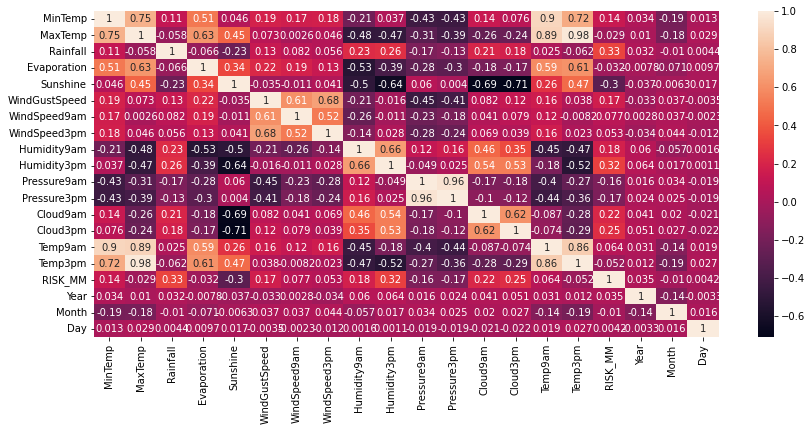

In [ ]:
# since the correlation table is not easily understandable we shall plot a heatmap
plt.figure(figsize=(14,6))
sns.heatmap(df[numerical_columns].corr(),annot=True)
# therer are many features with high correlation 

Text(0, 0.5, 'Temp3pm')

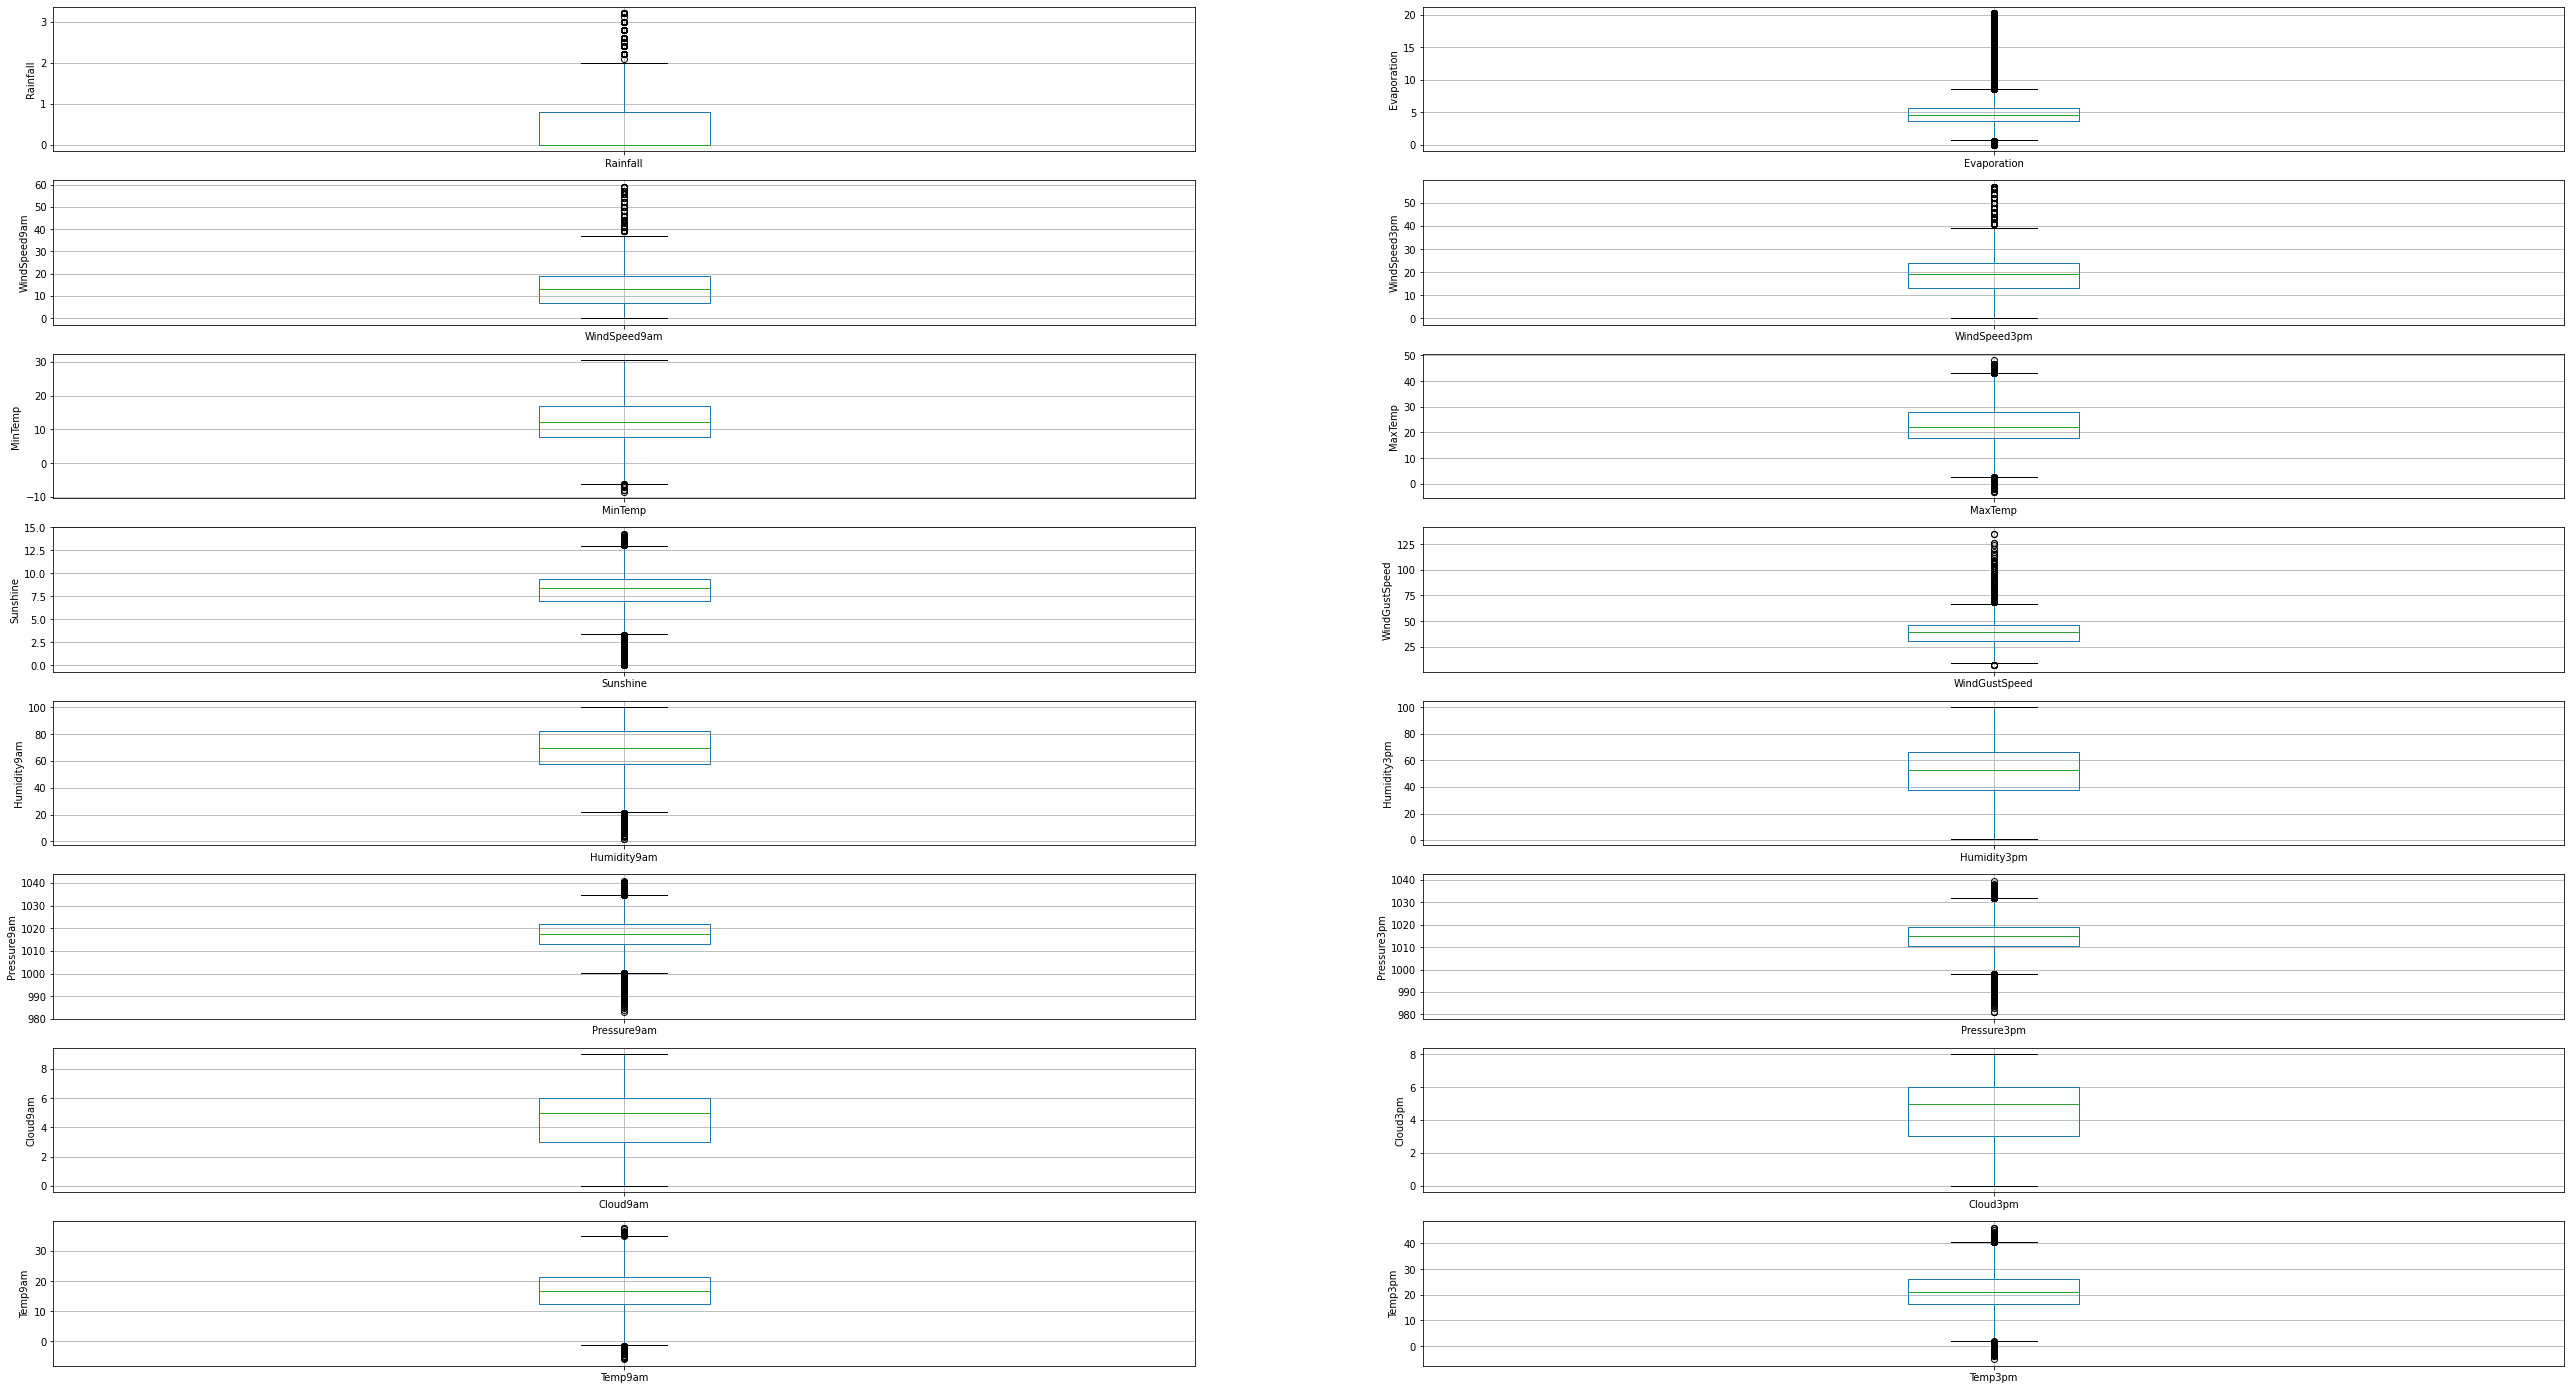

In [ ]:


plt.figure(figsize=(45,25))

plt.subplot(8, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

plt.subplot(8, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')

plt.subplot(8, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(8, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

plt.subplot(8, 2, 5)
fig = df.boxplot(column='MinTemp')
fig.set_title('')
fig.set_ylabel('MinTemp')

plt.subplot(8, 2, 6)
fig = df.boxplot(column='MaxTemp')
fig.set_title('')
fig.set_ylabel('MaxTemp')

plt.subplot(8, 2, 7)
fig = df.boxplot(column='Sunshine')
fig.set_title('')
fig.set_ylabel('Sunshine')

plt.subplot(8, 2, 8)
fig = df.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')


plt.subplot(8, 2, 9)
fig = df.boxplot(column='Humidity9am')
fig.set_title('')
fig.set_ylabel('Humidity9am')


plt.subplot(8, 2, 10)
fig = df.boxplot(column='Humidity3pm')
fig.set_title('')
fig.set_ylabel('Humidity3pm')


plt.subplot(8, 2, 11)
fig = df.boxplot(column= 'Pressure9am')
fig.set_title('')
fig.set_ylabel('Pressure9am')


plt.subplot(8, 2, 12)
fig = df.boxplot(column='Pressure3pm')
fig.set_title('')
fig.set_ylabel('Pressure3pm')


plt.subplot(8, 2, 13)
fig = df.boxplot(column='Cloud9am')
fig.set_title('')
fig.set_ylabel('Cloud9am')


plt.subplot(8, 2, 14)
fig = df.boxplot(column='Cloud3pm')
fig.set_title('')
fig.set_ylabel('Cloud3pm')


plt.subplot(8, 2, 15)
fig = df.boxplot(column='Temp9am')
fig.set_title('')
fig.set_ylabel('Temp9am')

plt.subplot(8, 2, 16)
fig = df.boxplot(column='Temp3pm')
fig.set_title('')
fig.set_ylabel('Temp3pm')


In [ ]:
# from the above boxplots we can see that the features Sunshine,Cloud9am,Cloud3pm,Humidity3pm have no outliers 

(array([  21.,  130.,  505., 1274., 2281., 4002., 5032., 5329., 5350.,
        4242., 3831., 2635., 1478.,  397.,   36.]),
 array([-8.5, -5.9, -3.3, -0.7,  1.9,  4.5,  7.1,  9.7, 12.3, 14.9, 17.5,
        20.1, 22.7, 25.3, 27.9, 30.5]),
 <a list of 15 Patch objects>)

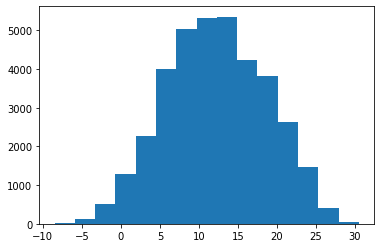

In [ ]:

plt.hist(df['MinTemp'],bins=15)


(array([  54.,   81.,  128.,  387., 2394., 5309., 6898., 6421., 5479.,
        4367., 3101., 1288.,  558.,  162.,   12.]),
 array([-3.1       ,  0.31333333,  3.72666667,  7.14      , 10.55333333,
        13.96666667, 17.38      , 20.79333333, 24.20666667, 27.62      ,
        31.03333333, 34.44666667, 37.86      , 41.27333333, 44.68666667,
        48.1       ]),
 <a list of 15 Patch objects>)

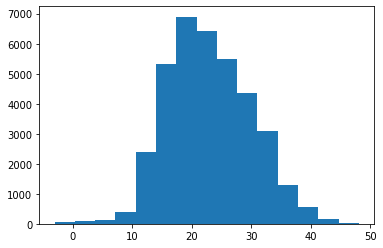

In [ ]:
plt.hist(df['MaxTemp'],bins=15)

(array([3.5417e+04, 5.9200e+02, 1.4500e+02, 5.9000e+01, 1.8000e+01,
        1.2000e+01, 5.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  0.        ,  24.73333333,  49.46666667,  74.2       ,
         98.93333333, 123.66666667, 148.4       , 173.13333333,
        197.86666667, 222.6       , 247.33333333, 272.06666667,
        296.8       , 321.53333333, 346.26666667, 371.        ]),
 <a list of 15 Patch objects>)

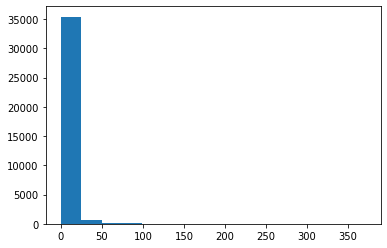

In [ ]:
plt.hist(df['Rainfall'],bins=15)

(array([1.4591e+04, 7.8500e+03, 1.3330e+03, 1.7700e+02, 4.8000e+01,
        1.8000e+01, 6.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0.        ,  5.41333333, 10.82666667, 16.24      , 21.65333333,
        27.06666667, 32.48      , 37.89333333, 43.30666667, 48.72      ,
        54.13333333, 59.54666667, 64.96      , 70.37333333, 75.78666667,
        81.2       ]),
 <a list of 15 Patch objects>)

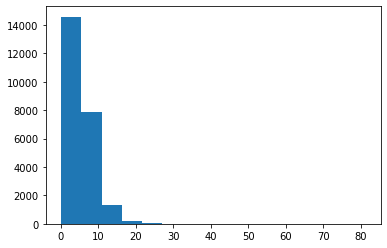

In [ ]:
 
 plt.hist(df['Evaporation'],bins=15)

(array([1888.,  974.,  887., 1052., 1086., 1371., 1367., 1671., 1757.,
        2356., 2604., 2810., 1512., 1649.,  333.]),
 array([ 0.        ,  0.95333333,  1.90666667,  2.86      ,  3.81333333,
         4.76666667,  5.72      ,  6.67333333,  7.62666667,  8.58      ,
         9.53333333, 10.48666667, 11.44      , 12.39333333, 13.34666667,
        14.3       ]),
 <a list of 15 Patch objects>)

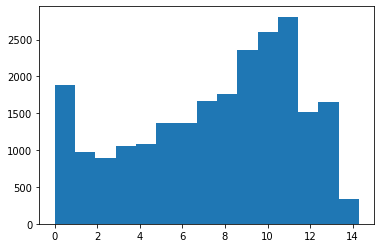

In [ ]:
 
plt.hist(df['Sunshine'],bins=15)

(array([3.4100e+02, 2.9840e+03, 6.4520e+03, 1.0422e+04, 5.7000e+03,
        4.3870e+03, 1.6060e+03, 9.9000e+02, 4.1400e+02, 1.1700e+02,
        7.1000e+01, 2.5000e+01, 4.0000e+00, 5.0000e+00, 2.0000e+00]),
 array([  7.        ,  15.53333333,  24.06666667,  32.6       ,
         41.13333333,  49.66666667,  58.2       ,  66.73333333,
         75.26666667,  83.8       ,  92.33333333, 100.86666667,
        109.4       , 117.93333333, 126.46666667, 135.        ]),
 <a list of 15 Patch objects>)

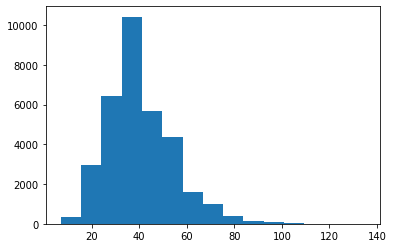

In [ ]:
plt.hist(df['WindGustSpeed'],bins=15)

(array([1.0500e+03, 8.7270e+03, 1.3474e+04, 7.0350e+03, 2.2690e+03,
        7.4100e+02, 1.6300e+02, 5.0000e+01, 6.0000e+00, 5.0000e+00]),
 array([  7. ,  19.8,  32.6,  45.4,  58.2,  71. ,  83.8,  96.6, 109.4,
        122.2, 135. ]),
 <a list of 10 Patch objects>)

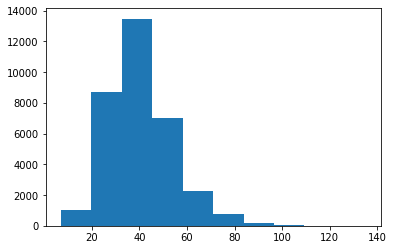

In [ ]:

plt.hist(df['WindGustSpeed'])

(array([9.8750e+03, 1.4926e+04, 8.1780e+03, 2.3150e+03, 7.2000e+02,
        1.6200e+02, 2.9000e+01, 1.0000e+01, 2.0000e+00, 2.0000e+00]),
 array([ 0. ,  8.7, 17.4, 26.1, 34.8, 43.5, 52.2, 60.9, 69.6, 78.3, 87. ]),
 <a list of 10 Patch objects>)

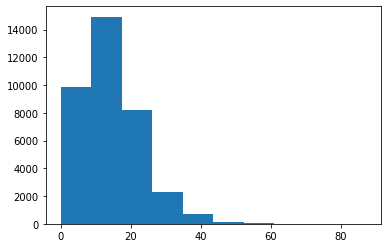

In [ ]:

plt.hist(df['WindSpeed9am'])


(array([3.5010e+03, 1.3903e+04, 1.2294e+04, 4.7110e+03, 1.5160e+03,
        2.5400e+02, 4.3000e+01, 1.0000e+01, 1.0000e+00, 2.0000e+00]),
 array([ 0. ,  8.7, 17.4, 26.1, 34.8, 43.5, 52.2, 60.9, 69.6, 78.3, 87. ]),
 <a list of 10 Patch objects>)

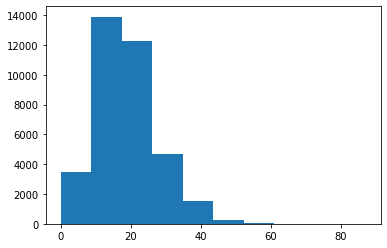

In [ ]:
plt.hist(df['WindSpeed3pm'])


(array([  89.,  378.,  737., 1492., 2803., 5395., 7650., 7280., 5548.,
        4939.]),
 array([  2. ,  11.8,  21.6,  31.4,  41.2,  51. ,  60.8,  70.6,  80.4,
         90.2, 100. ]),
 <a list of 10 Patch objects>)

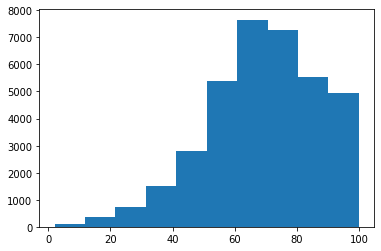

In [ ]:
plt.hist(df['Humidity9am'])


(array([ 468., 1932., 3261., 4899., 6132., 6973., 5849., 3574., 2008.,
        1274.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <a list of 10 Patch objects>)

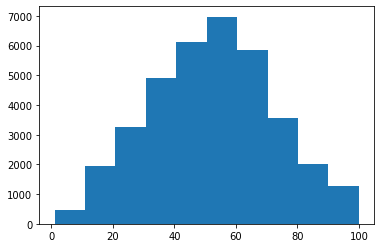

In [ ]:
plt.hist(df['Humidity3pm'])


(array([  14.,   84.,  290., 1464., 5704., 9851., 9497., 4976., 1210.,
         219.]),
 array([ 982.9 ,  988.71,  994.52, 1000.33, 1006.14, 1011.95, 1017.76,
        1023.57, 1029.38, 1035.19, 1041.  ]),
 <a list of 10 Patch objects>)

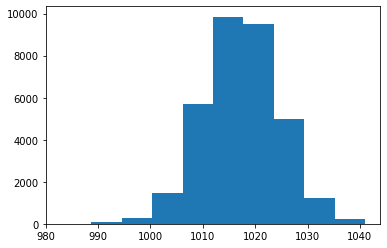

In [ ]:
plt.hist(df['Pressure9am'])


(array([1.0000e+01, 6.1000e+01, 2.4400e+02, 1.5270e+03, 6.0950e+03,
        1.0336e+04, 9.3370e+03, 4.6280e+03, 9.4500e+02, 1.4600e+02]),
 array([ 980.2 ,  986.14,  992.08,  998.02, 1003.96, 1009.9 , 1015.84,
        1021.78, 1027.72, 1033.66, 1039.6 ]),
 <a list of 10 Patch objects>)

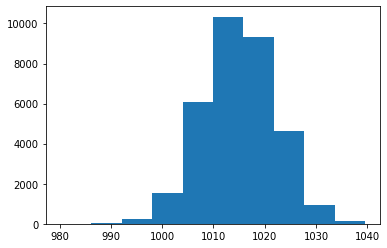

In [ ]:
plt.hist(df['Pressure3pm'])


(array([2.386e+03, 4.487e+03, 1.747e+03, 1.665e+03, 1.220e+03, 1.557e+03,
        2.383e+03, 5.822e+03, 3.113e+03, 1.000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

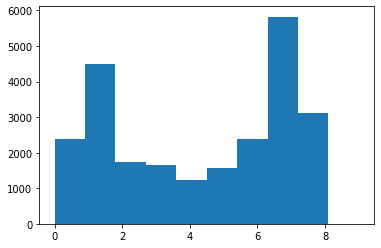

In [ ]:
plt.hist(df['Cloud9am'])


(array([1339., 4152., 1968., 2005.,    0., 1484., 2055., 2695., 5447.,
        2754.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

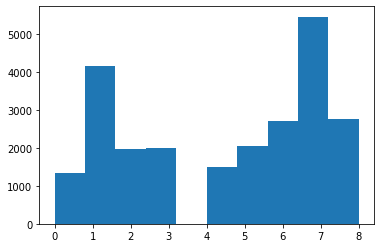

In [ ]:
plt.hist(df['Cloud3pm'])


(array([  50.,  345., 1599., 5787., 8799., 8498., 6680., 3486., 1067.,
          83.]),
 array([-5.9 , -1.54,  2.82,  7.18, 11.54, 15.9 , 20.26, 24.62, 28.98,
        33.34, 37.7 ]),
 <a list of 10 Patch objects>)

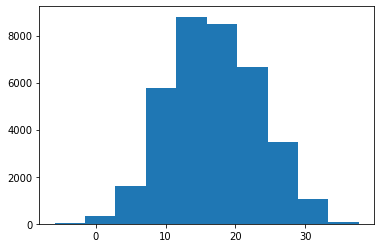

In [ ]:
plt.hist(df['Temp9am'])


(array([   60.,   151.,   780.,  5974., 10429.,  9117.,  6300.,  2827.,
          714.,    85.]),
 array([-5.100e+00,  2.000e-02,  5.140e+00,  1.026e+01,  1.538e+01,
         2.050e+01,  2.562e+01,  3.074e+01,  3.586e+01,  4.098e+01,
         4.610e+01]),
 <a list of 10 Patch objects>)

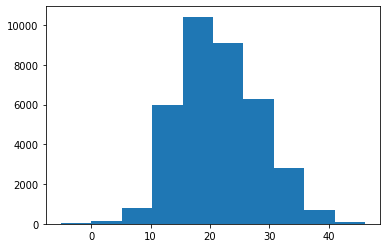

In [ ]:
plt.hist(df['Temp3pm'])

In [ ]:
#need to remove the outliers from the rainfall,windspeed9am,evaporation,windspeed3pm,\\maxtemp,pressure3pm,temp9am and temp3pm(outlier both below and above)

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print(f'Rainfall outliers are values < {Lower_fence} or > {Upper_fence}.')

Rainfall outliers are values < -2.4000000000000004 or > 3.2.


In [ ]:
#treating the outliers of rainfall
#looking at the number of outliers above the top whisker
df[df["Rainfall"]>3.2]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
15,Launceston,10.7,18.0,6.0,NaN,NaN,W,33.0,SSE,NW,...,1000.1,NaN,NaN,14.7,15.9,Yes,6.0,2009,11,22
21,NorahHead,13.8,19.2,18.6,NaN,NaN,SSE,61.0,SE,S,...,1021.4,NaN,NaN,15.9,15.6,Yes,10.8,2010,11,5
23,Launceston,14.4,21.1,4.4,NaN,NaN,N,57.0,ENE,N,...,1005.8,NaN,NaN,21.0,17.4,Yes,3.0,2010,10,31
33,Adelaide,12.5,20.0,4.2,NaN,9.9,SW,33.0,S,WSW,...,1022.3,NaN,NaN,16.2,19.7,Yes,0.0,2010,4,25
34,Albury,6.9,13.7,4.4,NaN,NaN,SE,46.0,ESE,ESE,...,1008.1,7.0,NaN,8.4,13.0,Yes,0.0,2009,6,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36867,Sydney,19.2,27.4,17.0,8.4,6.6,SE,NaN,WNW,E,...,1007.8,2.0,3.0,21.7,25.0,Yes,0.4,2009,3,15
36868,Albany,18.2,19.5,12.6,5.4,0.0,SE,NaN,S,SSE,...,1013.8,8.0,7.0,18.8,19.0,Yes,0.0,2010,1,25
36869,Witchcliffe,7.8,19.4,7.8,NaN,NaN,WSW,28.0,NNW,SW,...,1006.8,NaN,NaN,13.0,17.7,Yes,1.8,2009,6,25
36872,Watsonia,9.3,18.2,14.2,4.0,10.2,WSW,24.0,N,SE,...,1018.9,4.0,0.0,12.4,17.5,Yes,0.0,2009,9,18


In [ ]:
#treating the outliers of rainfall
#looking at the number of outliers above the top whisker
df[df["Rainfall"]<-2.40]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


In [ ]:
df['Rainfall']=np.where(df['Rainfall']>3.2,3.2,df['Rainfall'])

In [ ]:
df[df['Rainfall']>3.2]
#verifying the code above

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


In [ ]:
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print(f'WindSpeed9am outliers are values < {Lower_fence} or > {Upper_fence}.')

WindSpeed9am outliers are values < -32.0 or > 59.0.


In [ ]:
df[df['WindSpeed9am']>59.0]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
1412,Newcastle,16.4,19.5,0.0,NaN,NaN,SE,NaN,NW,NW,...,NaN,0.0,2.0,16.6,19.0,No,0.0,2009,9,23
2887,MelbourneAirport,8.8,17.5,0.0,4.0,6.5,N,89.0,N,N,...,1009.2,7.0,1.0,10.4,16.9,No,0.0,2009,8,15
5911,SydneyAirport,11.7,16.4,1.8,3.4,9.3,W,93.0,WNW,WSW,...,1004.0,3.0,3.0,12.4,15.7,Yes,0.0,2010,10,16
8175,Melbourne,16.8,26.4,0.0,8.8,6.2,N,80.0,N,N,...,1006.0,7.0,8.0,21.0,25.3,No,NaN,2011,10,28
9522,Newcastle,16.0,21.8,1.2,NaN,NaN,SE,NaN,NW,NW,...,NaN,1.0,4.0,18.2,21.2,Yes,0.0,2010,9,5
10732,MelbourneAirport,14.0,26.6,0.0,8.8,6.2,N,80.0,N,N,...,1006.4,7.0,8.0,18.6,24.6,No,11.4,2011,10,28
15775,Sale,6.6,16.9,0.0,4.4,7.2,W,104.0,WSW,WSW,...,1008.5,6.0,6.0,14.4,13.7,No,0.2,2009,4,15
17236,Newcastle,9.2,19.4,0.0,NaN,NaN,SE,NaN,NW,NW,...,NaN,2.0,1.0,14.5,18.5,No,0.0,2009,9,27
19775,Wollongong,16.3,21.3,3.2,NaN,NaN,WNW,126.0,WNW,WSW,...,1009.9,NaN,NaN,17.4,20.0,Yes,0.0,2010,9,5
19998,Melbourne,10.5,19.3,0.0,4.0,6.5,N,89.0,N,N,...,1010.3,5.0,2.0,12.7,18.2,No,0.0,2009,8,15


In [ ]:
df[df['WindSpeed9am']<-32.0]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


In [ ]:
df['WindSpeed9am']=np.where(df['WindSpeed9am']>59.0,59.0,df['WindSpeed9am'])

In [ ]:
df[df['WindSpeed9am']>59.0]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


In [ ]:
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print(f'Evaporation outliers are values < {Lower_fence} or > {Upper_fence}.')

Evaporation outliers are values < -10.600000000000001 or > 20.200000000000003.


In [ ]:
df[df['Evaporation']>20.20]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
62,Woomera,24.4,43.6,0.0,32.2,NaN,SSW,52.0,NNE,WSW,...,1005.8,0.0,NaN,33.8,41.0,No,0.0,2011,12,24
438,Moree,14.4,30.0,0.0,20.4,11.8,E,37.0,E,E,...,1017.2,1.0,3.0,20.9,28.7,No,0.0,2011,3,7
1817,Cobar,7.7,24.5,0.0,24.6,NaN,E,48.0,E,ENE,...,1015.9,6.0,1.0,15.8,23.3,No,0.0,2011,9,26
2078,AliceSprings,30.3,40.5,0.0,20.8,7.0,WSW,61.0,WNW,SSW,...,1003.6,3.0,5.0,35.9,39.0,No,0.0,2009,11,18
2334,Richmond,15.4,28.2,0.0,21.0,NaN,ESE,37.0,SSE,ENE,...,1011.6,NaN,NaN,21.3,27.4,No,0.0,2010,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34905,Nuriootpa,19.1,36.7,0.0,25.8,6.1,WNW,69.0,N,NW,...,1010.6,6.0,7.0,29.4,36.0,No,0.0,2009,11,2
34940,Mildura,16.4,29.7,0.0,21.0,11.8,S,52.0,S,SSW,...,1015.8,4.0,4.0,18.4,25.9,No,0.0,2009,1,15
35046,Adelaide,18.2,26.1,0.0,22.6,9.8,SSE,39.0,S,S,...,1015.4,NaN,NaN,20.3,24.9,No,0.0,2010,2,15
36422,Richmond,9.2,21.5,0.0,30.2,NaN,W,44.0,W,W,...,1006.0,NaN,NaN,16.1,20.9,No,0.0,2009,9,28


In [ ]:
df[df['Evaporation']<-10.60]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


In [ ]:
df['Evaporation']=np.where(df['Evaporation']>20.20,20.20,df['Evaporation'])

In [ ]:
df[df['Evaporation']>20.20]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


In [ ]:
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print(f'WindSpeed3pm outliers are values < {Lower_fence} or > {Upper_fence}.')

WindSpeed3pm outliers are values < -20.0 or > 57.0.


In [ ]:
df[df['WindSpeed3pm']>57.0]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
300,Melbourne,16.8,32.5,0.8,7.6,1.0,N,93.0,N,N,...,1000.8,7.0,7.0,19.2,29.1,No,2.4,2009,3,3
1412,Newcastle,16.4,19.5,0.0,NaN,NaN,SE,NaN,NW,NW,...,NaN,0.0,2.0,16.6,19.0,No,0.0,2009,9,23
2820,SydneyAirport,26.4,35.0,0.0,16.6,2.6,S,83.0,W,S,...,1016.0,7.0,7.0,29.5,20.5,No,0.6,2011,2,6
2887,MelbourneAirport,8.8,17.5,0.0,4.0,6.5,N,89.0,N,N,...,1009.2,7.0,1.0,10.4,16.9,No,0.0,2009,8,15
3897,GoldCoast,20.0,27.2,3.2,NaN,NaN,SSE,83.0,S,SSE,...,1026.3,NaN,NaN,23.5,25.1,Yes,0.6,2010,3,12
6624,Albany,7.8,16.1,3.2,5.8,4.0,SE,NaN,SSW,SW,...,1014.6,8.0,7.0,13.2,15.1,Yes,29.4,2009,6,4
7243,AliceSprings,24.2,39.6,1.4,9.4,12.0,SE,93.0,E,SE,...,1007.1,1.0,6.0,32.9,31.2,Yes,0.0,2009,1,25
10816,NorahHead,11.2,16.0,3.2,NaN,NaN,SSE,89.0,SE,S,...,1014.6,NaN,NaN,13.9,15.7,Yes,18.0,2011,10,2
11310,Woomera,10.6,20.5,0.0,12.0,9.1,W,109.0,NNW,W,...,1002.0,5.0,6.0,18.8,15.0,No,0.0,2009,9,22
17520,Ballarat,13.1,31.7,0.8,NaN,NaN,N,89.0,NNE,N,...,1001.0,8.0,NaN,20.0,27.2,No,2.0,2009,3,3


In [ ]:
df[df['WindSpeed3pm']<-20.0]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


In [ ]:
df['WindSpeed3pm']=np.where(df['WindSpeed3pm']>57.0,57.0,df['WindSpeed3pm'])

In [ ]:
df[df['WindSpeed3pm']>57.0]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


In [ ]:
IQR = df.MaxTemp.quantile(0.75) - df.MaxTemp.quantile(0.25)
Lower_fence = df.MaxTemp.quantile(0.25) - (IQR * 3)
Upper_fence = df.MaxTemp.quantile(0.75) + (IQR * 3)
print(f'MaxTemp outliers are values < {Lower_fence} or > {Upper_fence}.')

MaxTemp outliers are values < -12.499999999999993 or > 58.19999999999999.


In [ ]:
df[df['MaxTemp']>58.19]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


In [ ]:
df[df['MaxTemp']<-12.49]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


In [ ]:
IQR = df.Temp9am.quantile(0.75) - df.Temp9am.quantile(0.25)
Lower_fence = df.Temp9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.Temp9am.quantile(0.75) + (IQR * 3)
print(f'Temp9am outliers are values < {Lower_fence} or > {Upper_fence}.')

Temp9am outliers are values < -15.299999999999997 or > 49.099999999999994.


In [ ]:
df[df['Temp9am']>49.09]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


In [ ]:
df[df['Temp9am']<-15.29]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


In [ ]:
IQR = df.Temp3pm.quantile(0.75) - df.Temp3pm.quantile(0.25)
Lower_fence = df.Temp3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.Temp3pm.quantile(0.75) + (IQR * 3)
print(f'Pressure9am outliers are values < {Lower_fence} or > {Upper_fence}.')

Pressure9am outliers are values < -12.599999999999998 or > 55.3.


In [ ]:
df[df['Temp3pm']>55.3]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


In [ ]:
df[df['Temp3pm']<-12.59]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


In [ ]:
IQR = df.Pressure3pm.quantile(0.75) - df.Pressure3pm.quantile(0.25)
Lower_fence = df.Pressure3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.Pressure3pm.quantile(0.75) + (IQR * 3)
print(f'Pressure3pm outliers are values < {Lower_fence} or > {Upper_fence}.')

Pressure3pm outliers are values < 981.0000000000002 or > 1048.8999999999996.


In [ ]:
df[df['Pressure3pm']<981.00]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
11316,Hobart,8.2,14.4,0.0,3.0,2.4,NW,61.0,NNW,NW,...,980.2,8.0,4.0,11.3,13.4,No,3.2,2009,8,21
22378,Launceston,7.5,11.6,3.2,NaN,NaN,NNW,33.0,NNE,SSE,...,980.2,NaN,NaN,8.2,8.2,Yes,9.8,2009,4,26


In [ ]:
df['Pressure3pm']=np.where(df['Pressure3pm']<981.00,981.00,df['Pressure3pm'])

In [ ]:
df[df['Pressure3pm']<981.00]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


In [ ]:
df[df['Pressure3pm']>1048.89]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


In [ ]:
#imputation of missing values in the numerical columns
df[numerical_columns].isnull().sum()

MinTemp            338
MaxTemp            242
Rainfall           626
Evaporation      12846
Sunshine         13564
WindGustSpeed     3361
WindSpeed9am       662
WindSpeed3pm       646
Humidity9am        570
Humidity3pm        511
Pressure9am       3572
Pressure3pm       3552
Cloud9am         12500
Cloud3pm         12982
Temp9am            487
Temp3pm            444
RISK_MM            620
Year                 0
Month                0
Day                  0
dtype: int64

In [ ]:
for col in df[numerical_columns]:
   col_median=df[col].median()
   df[col].fillna(col_median, inplace=True)

In [ ]:
df[numerical_columns].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
Year             0
Month            0
Day              0
dtype: int64

In [ ]:
df.isnull().sum()
#all treatment for missing values and outlier completed

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
Year             0
Month            0
Day              0
dtype: int64

In [ ]:
#generating dummies for the catgeorical columns 
#since date has been dropped we have 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday' as the categorical columns of interest

categorical_columns_for_dummification=df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']]

In [ ]:
df[numerical_columns]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Year,Month,Day
0,5.1,14.3,0.0,1.8,8.9,30.0,7.0,6.0,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,0.0,2009,5,18
1,1.1,14.5,0.4,4.6,8.4,50.0,7.0,24.0,99.0,46.0,1001.5,1002.4,5.0,5.0,1.3,13.7,0.0,2009,7,3
2,19.7,26.2,0.0,7.2,7.2,41.0,19.0,31.0,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,0.2,2010,2,18
3,16.6,28.0,0.0,9.0,11.3,54.0,28.0,33.0,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,0.0,2010,3,4
4,14.6,25.3,0.0,4.6,8.4,43.0,6.0,28.0,64.0,67.0,1020.3,1015.0,5.0,5.0,22.2,22.6,0.4,2010,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,10.1,14.2,3.2,3.4,0.0,46.0,19.0,15.0,84.0,81.0,1016.2,1014.5,7.0,8.0,10.4,13.9,9.0,2011,6,14
36877,6.3,26.0,0.0,5.0,10.6,37.0,9.0,26.0,38.0,45.0,1024.2,1021.5,1.0,1.0,18.4,23.5,0.0,2010,9,24
36878,20.5,31.7,0.0,7.0,11.1,37.0,20.0,13.0,54.0,39.0,1012.6,1009.0,2.0,5.0,25.7,30.5,0.0,2011,5,6
36879,6.3,23.3,0.0,5.2,11.6,39.0,9.0,20.0,50.0,41.0,1023.9,1019.9,0.0,1.0,16.4,20.9,0.0,2010,10,12


In [ ]:
X=pd.concat([df[numerical_columns], pd.get_dummies(categorical_columns_for_dummification.RainToday,drop_first=True),pd.get_dummies(categorical_columns_for_dummification.Location,drop_first=True),pd.get_dummies(categorical_columns_for_dummification.WindGustDir,drop_first=True),pd.get_dummies(categorical_columns_for_dummification.WindDir9am,drop_first=True),pd.get_dummies(categorical_columns_for_dummification.WindDir3pm,drop_first=True)],axis=1)

In [ ]:
X.shape

(36881, 111)

In [ ]:
X.isnull().sum()

MinTemp        0
MaxTemp        0
Rainfall       0
Evaporation    0
Sunshine       0
              ..
SSW            0
SW             0
W              0
WNW            0
WSW            0
Length: 111, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
y=X['RISK_MM']
X=X.drop('RISK_MM',axis=1)

In [ ]:
X.shape

(36881, 110)

In [ ]:
y.shape

(36881,)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
r2_scr = r2_score(y_test,y_pred) 
mse = mean_squared_error(y_test, y_pred)

In [ ]:
r2_scr

0.1850548765146094

In [ ]:
mse

69.51067277340938